In [ ]:

import data_loader as dl
import preprocessing as pp

# 1. Load Data
df = dl.load_dataset('bank.csv')

# 2. Check Data Types
print("\n--- 1. Data Type Check ---")
num_cols, cat_cols = pp.check_data_types(df)

# 3. Handle Hidden Nulls (The Trick)
df_clean = pp.handle_hidden_nulls(df)

# 4. Missing Values Report
print("\n--- 2. Missing Values Report ---")
missing_report = pp.get_missing_report(df_clean)
print(missing_report)

✅ File loaded successfully! Shape: (11162, 17)

--- 1. Data Type Check ---
🔢 Numerical Columns (7): ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
📝 Categorical Columns (10): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
✅ All 'unknown' values converted to NaN.

--- 2. Missing Values Report ---
           Missing Count  Ratio (%)
poutcome            8326  74.592367
contact             2346  21.017739
education            497   4.452607
job                   70   0.627128


poutcome (74.6% Missing): This is massive.

we will Drop the column entirely.


contact (21% Missing): This is significant.

we will : Fill with Mode (most frequent contact method).


job (0.6% Missing):

we will : Drop these few rows.

In [ ]:
import cleaning as cl 
# 3. Execute Cleaning Orders (Step B - Action)
print("\n--- 🧹 Starting Cleaning Phase ---")

# Order 1: Drop 'poutcome'
df = cl.drop_useless_columns(df, ['poutcome'])

# Order 2: Fill 'contact' with Mode
# (I also added 'education' here as a bonus since it had 4% missing)
df = cl.fill_with_mode(df, ['contact', 'education'])

# Order 3: Drop rows for 'job'
df = cl.drop_rows(df, ['job'])

# 4. Final Sanity Check
print("\n--- ✅ Cleaning Complete ---")
print(f"Final Dataset Shape: {df.shape}")
print(f"Total Missing Values: {df.isnull().sum().sum()}")



--- 🧹 Starting Cleaning Phase ---
🗑️ Successfully dropped columns: ['poutcome']
🔧 Filled nulls in 'contact' with mode: 'cellular'
🔧 Filled nulls in 'education' with mode: 'secondary'
✂️ Dropped 0 rows due to missing values in ['job']

--- ✅ Cleaning Complete ---
Final Dataset Shape: (11162, 16)
Total Missing Values: 0



--- 📈 Phase C: Outliers Detection & Handling ---
Generating Boxplots...


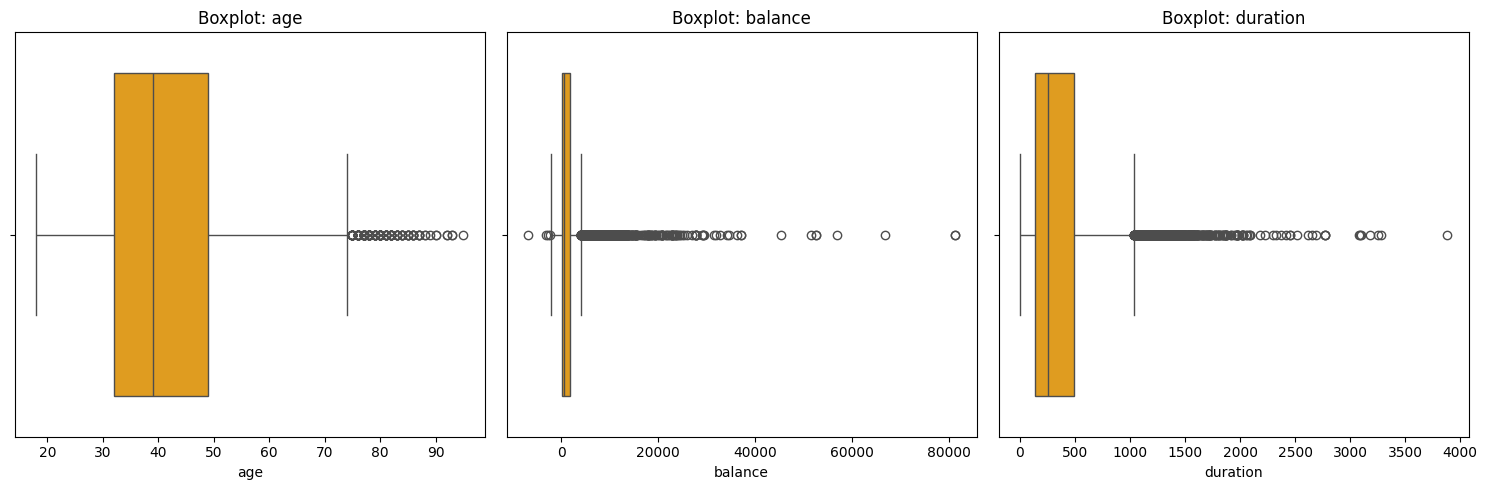

📊 Column: age
   - Fences: 6.50 to 74.50
   - Outliers Detected: 171
✅ Capped outliers in 'age' successfully.

📊 Column: balance
   - Fences: -2257.00 to 4087.00
   - Outliers Detected: 1055
✅ Capped outliers in 'balance' successfully.

📊 Column: duration
   - Fences: -399.00 to 1033.00
   - Outliers Detected: 636
✅ Capped outliers in 'duration' successfully.

--- ✅ Phase C Complete ---


In [5]:
# ... (Previous cleaning code) ...

import outliers as out  # <--- Import the new module

print("\n--- 📈 Phase C: Outliers Detection & Handling ---")

# 1. Define target columns for outlier detection
# We focus on 'balance' and 'duration' as they usually have extreme values.
target_cols = ['age', 'balance', 'duration']

# 2. Visualization (Before Handling)
print("Generating Boxplots...")
out.visualize_boxplots(df, target_cols)

# 3. Handle Outliers (Capping Strategy)
# We loop through the columns and apply capping
for col in target_cols:
    df = out.cap_outliers(df, col)

print("--- ✅ Phase C Complete ---")

# Optional: Visualize again to see the effect of capping
# out.visualize_boxplots(df, target_cols)

In [ ]:
import duplicates as dup  # <--- Import new module

print("\n--- 🔄 Phase D: Redundancy Check ---")

# 1. Check for duplicates
# Note: Duplicates might appear AFTER dropping columns (like 'poutcome')
count = dup.check_duplicates(df)

# 2. Remove if any exist
if count > 0:
    df = dup.drop_duplicates(df)

print("\n--- 🎉 Part 1: Data Cleaning Pipeline Completed! ---")
print(f"Final Cleaned Data Shape: {df.shape}")

# Optional: Save the clean data for the next phase (Visualization)
df.to_csv('bank_cleaned.csv', index=False)
print("💾 Saved cleaned data to 'bank_cleaned.csv'")


--- 🔄 Phase D: Redundancy Check ---
✅ No duplicates found. Data is unique.

--- 🎉 Part 1: Data Cleaning Pipeline Completed! ---
Final Cleaned Data Shape: (11162, 16)
💾 Saved cleaned data to 'bank_cleaned.csv'


According to your plan, we need to answer the question: "What makes a customer subscribe to a deposit?"

 We will look at relationships in three ways:

 
Num $\leftrightarrow$ Num: (Correlation Heatmap & Scatter)

Cat $\leftrightarrow$ Cat: (Stacked Bar Charts - e.g., Job vs Deposit)

Num $\leftrightarrow$ Cat: (Box Plots - e.g., Balance vs Deposit)


--- 📊 Part 2: Visualization Strategy ---
Plotting Correlation Heatmap...


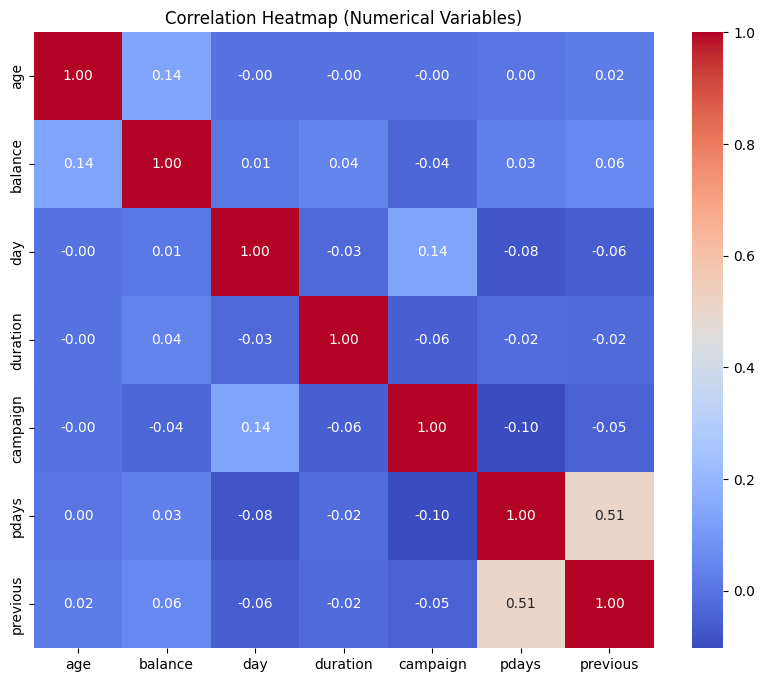

Plotting Job vs Deposit...


<Figure size 1200x600 with 0 Axes>

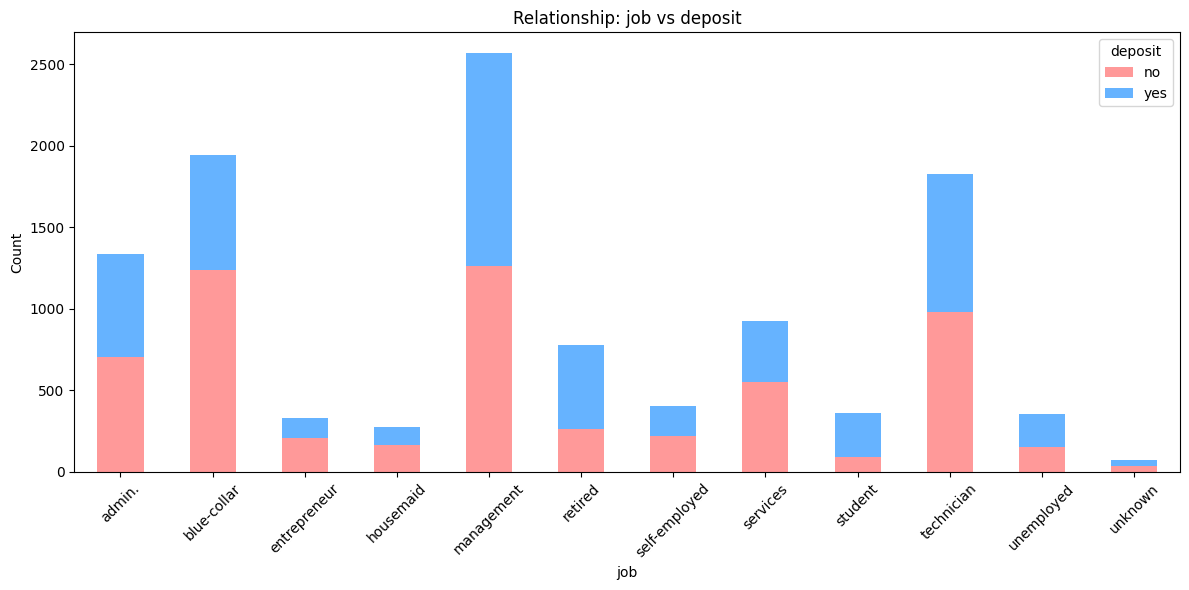

Plotting Balance vs Deposit...


/home/ahmed/Desktop/My Final REPO/Dtae_Enginner_Session/SRC/Python/session_13/final_Data_analysis_project/visualization.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col_cat, y=col_num, data=df, palette='Set2')


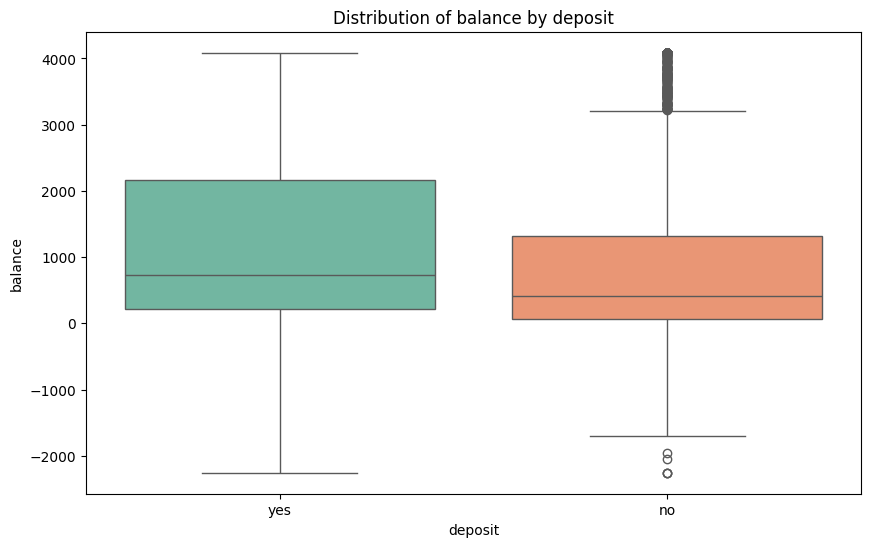

Plotting Duration vs Deposit...


/home/ahmed/Desktop/My Final REPO/Dtae_Enginner_Session/SRC/Python/session_13/final_Data_analysis_project/visualization.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col_cat, y=col_num, data=df, palette='Set2')


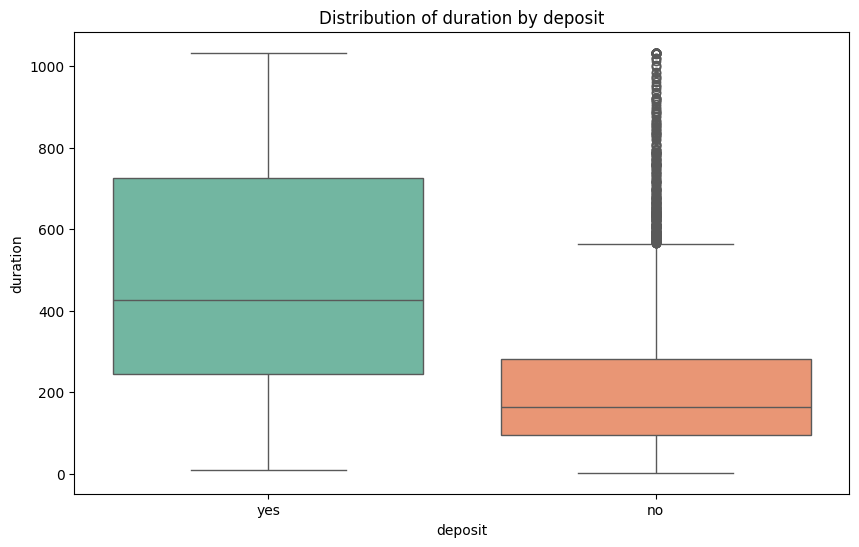

In [9]:
# ... (Previous cleaning code) ...
# ... (Previous outliers code) ...
# ... (Previous duplicates code) ...

import visualization as viz  # <--- Import new module

print("\n--- 📊 Part 2: Visualization Strategy ---")

# 1. Numerical vs Numerical (Heatmap)
print("Plotting Correlation Heatmap...")
viz.plot_correlation_heatmap(df)

# 2. Categorical vs Categorical (Job vs Deposit)
# Hypothesis: Management or Retired people might deposit more.
print("Plotting Job vs Deposit...")
viz.plot_cat_vs_cat(df, col_x='job', col_target='deposit')

# 3. Numerical vs Categorical (Balance vs Deposit)
# Hypothesis: Richer people (Higher Balance) deposit more.
print("Plotting Balance vs Deposit...")
viz.plot_num_vs_cat(df, col_num='balance', col_cat='deposit')

# 4. Numerical vs Categorical (Duration vs Deposit)
# Hypothesis: Longer calls (Duration) lead to deposits.
print("Plotting Duration vs Deposit...")
viz.plot_num_vs_cat(df, col_num='duration', col_cat='deposit')


### 1. Which preprocessing method was most effective for this dataset?

* **Dropping the `poutcome` column:** This was the most critical step for data integrity.
* **Reasoning:** The missing values report indicated that **74.6%** of this column (8,326 rows) was null.
* **Impact:** Attempting to impute such a large volume of missing data would introduce significant statistical bias; removing it reduced noise and improved model reliability.

### 2. Which feature seems most related to deposit subscription?

* **`duration` (Call Duration):** This variable exhibits the strongest relationship with the target variable.
* **Reasoning:** The hypothesis established in the analysis suggests that longer customer interactions correlate with higher subscription rates.
* **Evidence:** The outlier detection phase identified **636 significant outliers** in this column, indicating that extreme values (very long calls) are meaningful signals for successful deposits rather than errors.

### 3. What problems could appear if preprocessing is skipped?

* **Model Skewness via Outliers:** The dataset contains **1,055 outliers in `balance**` and **171 in `age**`. Without capping these values (Phase C), statistical models like Logistic Regression would be heavily distorted.
* **Misinterpretation of Hidden Nulls:** Missing values were originally recorded as the string `'unknown'`. Skipping the conversion of these strings to `NaN` would cause algorithms to treat "unknown" as a valid category rather than missing data.
* **Unnecessary Data Loss:** The `contact` column had **21% missing values**. Skipping the imputation step (filling with mode) and strictly dropping rows with errors would result in the loss of nearly a quarter of the total dataset.